# Project_On
# IDBM_Movie_Data:

## Aim:

### The aim of the project is to analyze the IDBM_Movie_Data with the following details:

In [391]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

#### Load the data into your working area and get the information about the null values.

In [392]:
data = pd.read_csv('movies/IMDB_Movie_Data.csv')
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [393]:
data.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

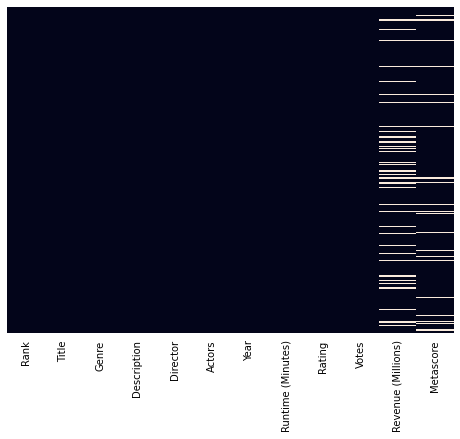

In [394]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data.isnull(), cbar=False, ax=ax)
ax.set_yticks([]);
ax.tick_params(bottom='')

#### Rename the columns for the analysis purpose if any columns are not in proper way.

In [395]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [396]:
data = data.rename(columns = {'Runtime (Minutes)':'Runtime_In_Minutes','Revenue (Millions)':'Revenue_In_Millions'})

In [397]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_In_Minutes', 'Rating', 'Votes', 'Revenue_In_Millions',
       'Metascore'],
      dtype='object')

#### Handle the missing value columns with the proper assumtion.

In [398]:
data.describe().iloc[:,-2:].T

,count,mean,std,min,25%,50%,75%,max
Revenue_In_Millions,872.0,82.956376,103.253540,0.0,13.27,47.985,113.715,936.63
Metascore,936.0,58.985043,17.194757,11.0,47.00,59.500,72.000,100.00


In [399]:
data['Revenue_In_Millions'] = data['Revenue_In_Millions'].fillna(round(data['Revenue_In_Millions'].mean(),2))
data['Metascore'] = data['Metascore'].fillna(round(data['Metascore'].mean())).astype('int')

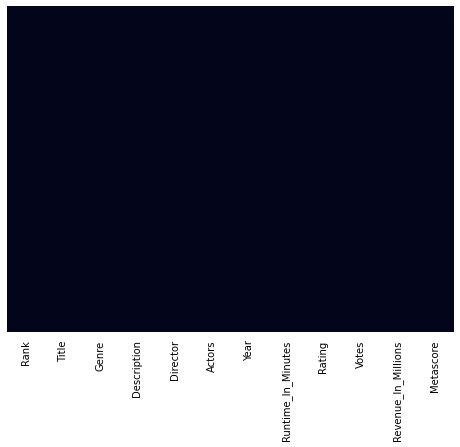

In [400]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data.isnull(), cbar=False, ax=ax)
ax.set_yticks([]);
ax.tick_params(bottom='')

In [401]:
data.describe().iloc[:,-2:].T

,count,mean,std,min,25%,50%,75%,max
Revenue_In_Millions,1000.0,82.95684,96.412043,0.0,17.4425,60.375,99.1775,936.63
Metascore,1000.0,58.98600,16.634859,11.0,47.7500,59.000,71.0000,100.00


*Doing this has no impactful effect on the overall data.*

####  Generate the relationship between each continuous variable using corr() method.

In [402]:
corr = data.corr()
corr

,Rank,Year,Runtime_In_Minutes,Rating,Votes,Revenue_In_Millions,Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252995,-0.185153
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117558,-0.076074
Runtime_In_Minutes,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247831,0.202235
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189524,0.604717
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607937,0.318092
Revenue_In_Millions,-0.252995,-0.117558,0.247831,0.189524,0.607937,1.000000,0.132291
Metascore,-0.185153,-0.076074,0.202235,0.604717,0.318092,0.132291,1.000000


Since there is a duplicate of every value, the repeated ones will be masked, even before plotting it.

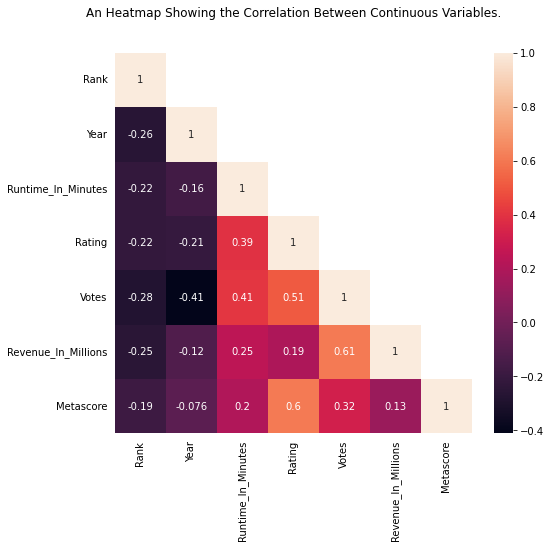

In [403]:
mask = np.zeros((7,7))
for i in range(6):
    mask[i+1:,i]=1
mask = mask.T


plt.figure(figsize = (8,7))
sns.heatmap(corr, annot = True, mask = mask) 
plt.tick_params(bottom = '', left = '')
plt.title('An Heatmap Showing the Correlation Between Continuous Variables.\n\n');

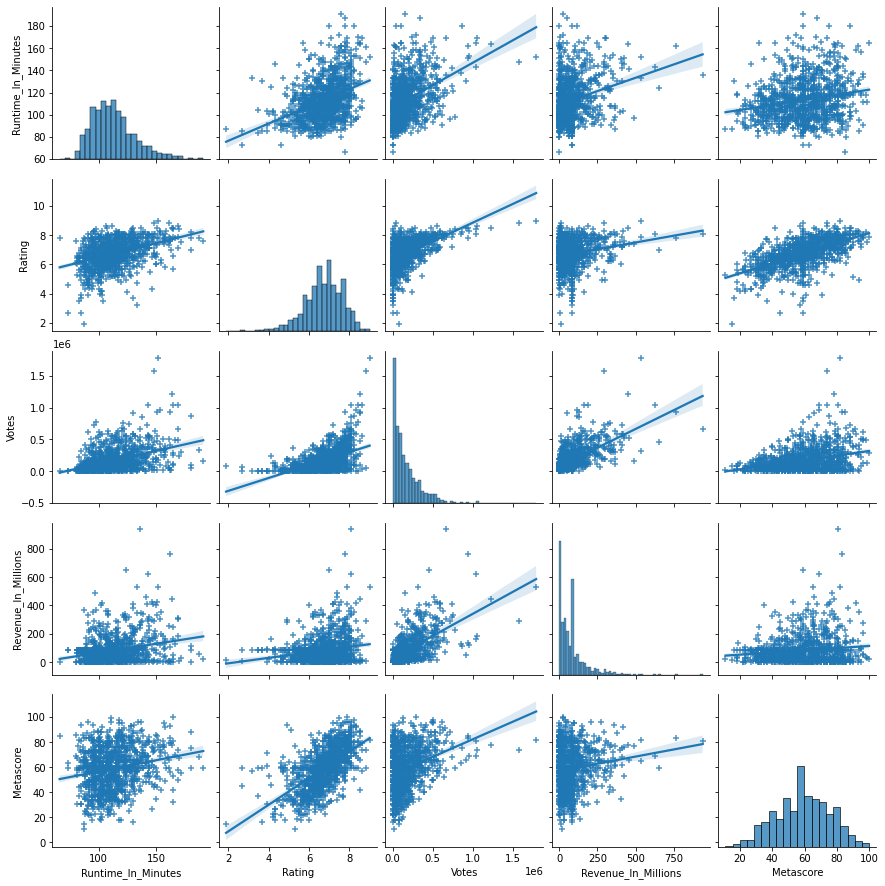

In [404]:
PairplotCol = ['Genre','Runtime_In_Minutes','Rating','Votes','Revenue_In_Millions','Metascore'] #Selects those with a tangible correlation.
sns.pairplot(data[PairplotCol], markers='+', kind='reg')

####  Find the movies directed by 'James Gunn', & 'Ridley Scott' with the rating greater than or equal to 8.

In [405]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_In_Minutes,Rating,Votes,Revenue_In_Millions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40


In [406]:
condition_1 = data['Director']=='James Gunn'
condition_2 = data['Director']=='Ridley Scott'
condition_3 = data['Rating']>=8
filtered = data.Title[((condition_1) | (condition_2)) & (condition_3)].values
print('Movies directed by James Gunn, & Ridley Scott with their ratings greater than or equal to 8 are:',filtered, sep = '\n\n')

Movies directed by James Gunn, & Ridley Scott with their ratings greater than or equal to 8 are:

['Guardians of the Galaxy' 'The Martian']


####  Display all the movies directed by 'Ridley Scott'.

In [407]:
Movcondition = data.Director=='Ridley Scott'
Movfiltered = data.Title[Movcondition].values
print('Movies directed by Ridley Scott are:',Movfiltered, sep = '\n\n')

Movies directed by Ridley Scott are:

['Prometheus' 'The Martian' 'Robin Hood' 'American Gangster'
 'Exodus: Gods and Kings' 'The Counselor' 'A Good Year' 'Body of Lies']


####  Display all the director's who got the rating >= 8 for their movies.

In [408]:
Dircondition = data.Rating>=8
Dirfiltered = data.Director[Dircondition].values
print('Directors whose movies had ratings of at least 8 are:',Dirfiltered, sep='\n\n')

Directors whose movies had ratings of at least 8 are:

['James Gunn' 'Damien Chazelle' 'Mel Gibson' 'Garth Davis'
 'Denis Villeneuve' 'S.S. Rajamouli' 'Tim Miller' 'Christopher Nolan'
 'J.J. Abrams' 'Christopher Nolan' 'Christopher Nolan' 'George Miller'
 'Byron Howard' 'Joss Whedon' 'Quentin Tarantino' 'Christopher Nolan'
 'Martin Scorsese' 'David Fincher' 'Denis Villeneuve' 'Tate Taylor'
 'Makoto Shinkai' 'Martin Scorsese' 'Ridley Scott' 'Steve McQueen'
 'David Yates' 'Nitesh Tiwari' 'Christopher Nolan'
 'Alejandro González Iñárritu' 'Damien Chazelle' 'Ethan Coen'
 'Martin Scorsese' 'J.J. Abrams' 'Lenny Abrahamson' 'Quentin Tarantino'
 'Chan-wook Park' 'David Lynch' 'Bryan Singer' 'Martin Campbell'
 'Spike Jonze' 'Asghar Farhadi' 'Tom McCarthy' "Gavin O'Connor"
 'Sean Penn' 'Morten Tyldum' 'Guillermo del Toro' 'Stephen Chbosky'
 'Wes Anderson' 'Pete Docter' 'Olivier Nakache' 'Darren Aronofsky'
 'John Carney' 'Paul Thomas Anderson' 'Jean-Marc Vallée' 'Ron Howard'
 'Danny Boyle' 'Paul 

####  Find all the movies directed by 'James Gunn', & 'Ridley Scott'.

In [409]:
condition_1 = data['Director']=='James Gunn'
condition_2 = data['Director']=='Ridley Scott'
James_Ridley_Filtered = data.Title[(condition_1) | (condition_2)].values
print('Movies directed by James Gunn, & Ridley Scott are: ',James_Ridley_Filtered, sep='\n\n')

Movies directed by James Gunn, & Ridley Scott are: 

['Guardians of the Galaxy' 'Prometheus' 'The Martian' 'Robin Hood'
 'American Gangster' 'Exodus: Gods and Kings' 'The Counselor'
 'A Good Year' 'Body of Lies' 'Slither' 'Super']


####  Display all the movies with the ratings between 8 & 9 and also the films with the highest rating.

In [410]:
HighRatingfilter = data.Title[(8<data['Rating']) & (data['Rating']<9)].values
print('Movies with ratings between 8 and 9 are: ',HighRatingfilter,sep='\n\n')

Movies with ratings between 8 and 9 are: 

['Guardians of the Galaxy' 'La La Land' 'Hacksaw Ridge' 'Lion'
 'Bahubali: The Beginning' 'Interstellar'
 'Star Wars: Episode VII - The Force Awakens' 'The Prestige'
 'Mad Max: Fury Road' 'Zootopia' 'The Avengers' 'Inglourious Basterds'
 'Inception' 'The Wolf of Wall Street' 'Gone Girl' 'Prisoners' 'The Help'
 'Kimi no na wa' 'The Departed' '12 Years a Slave'
 'Harry Potter and the Deathly Hallows: Part 2' 'Dangal'
 'The Dark Knight Rises' 'Whiplash' 'No Country for Old Men'
 'Shutter Island' 'Room' 'Django Unchained' 'Ah-ga-ssi'
 'Twin Peaks: The Missing Pieces' 'Spotlight' 'Warrior' 'Into the Wild'
 'The Imitation Game' "Pan's Labyrinth" 'The Grand Budapest Hotel'
 'Inside Out' 'The Intouchables' 'There Will Be Blood' 'Rush'
 'The Bourne Ultimatum' '3 Idiots' 'Jagten' 'The Lives of Others'
 'Paint It Black' 'Up' 'Mommy' 'WALL·E' 'Relatos salvajes' 'Gran Torino'
 'Toy Story 3' "Hachi: A Dog's Tale" 'Incendies' 'El secreto de sus ojos'
 'PK' '

In [411]:
HighestRatingfilter = data.Title[data['Rating'] == data['Rating'].max()].values
print('The movie with the highest rating is: ',HighestRatingfilter, sep = '\n\n')

The movie with the highest rating is: 

['The Dark Knight']


####  Find the movies directed by both 'Christopher Nolan' and 'Ridley Scott'

In [412]:
condition_one = data['Director']=='Christopher Nolan'
condition_2 = data['Director']=='Ridley Scott'
Chris_Ridley_Filtered = data.Title[(condition_one) | (condition_2)].values
print('Movies directed by Christopher Nolan & Ridley Scott are: ',Chris_Ridley_Filtered, sep='\n\n')

Movies directed by Christopher Nolan & Ridley Scott are: 

['Prometheus' 'Interstellar' 'The Dark Knight' 'The Prestige' 'Inception'
 'The Martian' 'The Dark Knight Rises' 'Robin Hood' 'American Gangster'
 'Exodus: Gods and Kings' 'The Counselor' 'A Good Year' 'Body of Lies']


####  Find all movies that were released between 2006 and 2010, have a rating above 8.0, but made below the 50th percentile in revenue.

In [413]:
per_50 = data.Revenue_In_Millions.describe()['50%']
Filtered = data.Title[(data.Year>2006) & (data.Year<2010) & (data.Rating >8.0) & (data.Revenue_In_Millions<per_50)]
print('Movies that were released between 2006 and 2010, have a rating above 8.0, but made below the 50th percentile in revenue',Filtered,sep='\n\n')

Movies that were released between 2006 and 2010, have a rating above 8.0, but made below the 50th percentile in revenue

197             Into the Wild
299       There Will Be Blood
430                  3 Idiots
742    El secreto de sus ojos
991          Taare Zameen Par
Name: Title, dtype: object


####  Find all movies that were released between 2006 and 2010, have a rating above 8.0, but made below the 25th percentile in revenue.

In [414]:
per_25 = data.Revenue_In_Millions.describe()['25%']
Filtered = data.Title[(data.Year>2006) & (data.Year<2010) & (data.Rating >8.0) & (data.Revenue_In_Millions<per_25)]
print('Movies that were released between 2006 and 2010, have a rating above 8.0, but made below the 25th percentile in revenue',Filtered,sep='\n\n')

Movies that were released between 2006 and 2010, have a rating above 8.0, but made below the 25th percentile in revenue

430            3 Idiots
991    Taare Zameen Par
Name: Title, dtype: object


#### Finally give the feedback for all movies with 'Good' if the movie 'rating' is >= 8 and 'Average' if the movie rating doesn't follow the condition given.

In [415]:
ge_8_feedback = data[data.Rating.ge(8.0)]
lt_8_feedback = data[data.Rating.lt(8.0)]

In [416]:
ge_8_feedback.describe().T  # Feedback: Good movies

,count,mean,std,min,25%,50%,75%,max
Rank,78.0,283.820513,250.106613,1.00,94.000,179.50,465.7500,992.00
Year,78.0,2011.705128,3.388709,2006.00,2009.000,2012.00,2015.0000,2016.00
Runtime_In_Minutes,78.0,128.897436,21.369106,91.00,114.250,127.50,144.0000,180.00
Rating,78.0,8.201282,0.217120,8.00,8.100,8.10,8.3000,9.00
Votes,78.0,477216.166667,348901.111431,61.00,227796.250,481807.00,619792.5000,1791916.00
Revenue_In_Millions,78.0,140.486667,162.667980,0.61,18.805,87.04,186.9025,936.63
Metascore,78.0,76.884615,11.454008,42.00,69.500,78.50,85.0000,98.00


In [417]:
lt_8_feedback.describe().transpose()  # Feedback: Average movies

,count,mean,std,min,25%,50%,75%,max
Rank,922.0,518.830803,284.497644,2.0,282.250,524.5,766.50,1000.00
Year,922.0,2012.874187,3.175197,2006.0,2011.000,2014.0,2016.00,2016.00
Runtime_In_Minutes,922.0,111.841649,17.970143,66.0,99.000,110.0,122.00,191.00
Rating,922.0,6.598156,0.874594,1.9,6.100,6.7,7.20,7.90
Votes,922.0,143801.945770,140681.595283,96.0,33436.000,101075.0,209606.50,935408.00
Revenue_In_Millions,922.0,78.089892,86.984123,0.0,17.225,58.8,89.62,760.51
Metascore,922.0,57.471800,16.117032,11.0,46.000,59.0,68.00,100.00
